# WiTracing Result

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 
import seaborn as sns
import pandas as pd

import IPython
from IPython.display import clear_output

In [2]:
CSV_FILE = "../data/preprocessed_data.csv"
OUT_CSV_FILE = '../data/data.csv"'

In [3]:
def preprocess(df):
    df['tx'] = df['tx'].str.lower()
    df['x'] = df['x'].round(2)
    df['y'] = df['y'].round(2)
    df['z'] = df['z'].round(2)
    return df

df = pd.read_csv(CSV_FILE)
df = preprocess(df)
df

,tx,x,y,z,rssi,timestamp
0,tx1,750.02,598.52,94.50,-55,1667897331077
1,tx2,750.02,598.52,94.50,-62,1667897331085
2,tx3,750.02,598.52,94.50,-67,1667897331091
3,tx4,750.02,598.52,94.50,-63,1667897331095
4,tx5,750.02,598.52,94.50,-66,1667897331100
...,...,...,...,...,...,...
136449,tx6,6.30,687.77,93.58,-71,1667899417224
136450,tx7,6.30,687.77,93.58,-60,1667899417230
136451,tx8,6.30,687.77,93.58,-66,1667899417236
136452,tx9,6.30,687.77,93.58,-70,1667899417242


### X-Y Coordinates for All Measurement

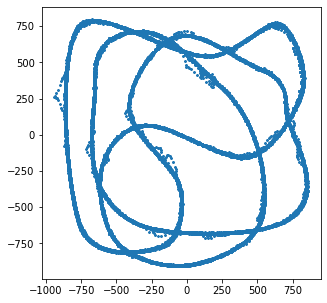

In [4]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df.x, df.y, s=1)
plt.show()

### X-Y Coordinates for Single TX

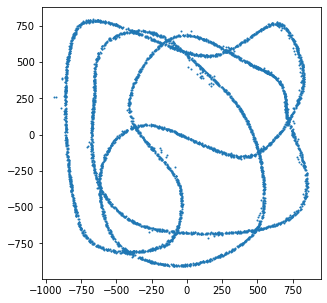

In [5]:
tx_df = df[df.tx == 'tx4']
fig = plt.figure(figsize=(5,5))
plt.scatter(tx_df.x, tx_df.y, s=1)
plt.show()

In [6]:
list(df.tx.unique())

['tx1',
 'tx2',
 'tx3',
 'tx4',
 'tx5',
 'tx6',
 'tx7',
 'tx8',
 'tx9',
 'tx10',
 'tx11',
 'tx12',
 'tx13',
 'tx14',
 'tx15',
 'tx16',
 'tx17',
 'tx18',
 'tx19',
 'tx20',
 'tx21',
 'tx22',
 'tx23',
 'tx24',
 'tx25']

### Format Raw Data

In [7]:
def formating(df):
    prev_xyz = [0,0,0]
    tx_num = len(df.tx.unique())
    columns = ['t', 'x', 'y', 'z'] + list(df.tx.unique())
    prep_df = pd.DataFrame(columns = columns)
    
    # although using concat method can significantly improve the the efficiency in this part, but we need to process one-by-one in the wi tracing system
    total = len(df)
    for num, row in df.iterrows():
        xyz = [row['x'], row['y'], row['z']]
        # if coordinate change
        index = len(prep_df.index)
        if prev_xyz != xyz:
            prep_df.loc[index] = [row['timestamp'], xyz[0], xyz[1], xyz[2]] + [-255] * tx_num
            prev_xyz = xyz
            prep_df.at[index, row['tx']] = row['rssi']
        else:
            prep_df.at[index - 1, row['tx']] = row['rssi']
        clear_output(wait=True)
        progress = round(num / total * 100, 2)
        print(f'Progress: { progress:.2f} %')
    return prep_df

In [8]:
prep_df = formating(df)
display(prep_df)

Progress: 100.00 %


,t,x,y,z,tx1,tx2,tx3,tx4,tx5,tx6,...,tx16,tx17,tx18,tx19,tx20,tx21,tx22,tx23,tx24,tx25
0,1.667897e+12,750.02,598.52,94.50,-55.0,-62.0,-67.0,-63.0,-66.0,-69.0,...,-74.0,-72.0,-70.0,-69.0,-68.0,-67.0,-57.0,-53.0,-73.0,-61.0
1,1.667897e+12,759.46,579.46,94.11,-55.0,-63.0,-67.0,-63.0,-66.0,-68.0,...,-77.0,-72.0,-66.0,-71.0,-57.0,-68.0,-62.0,-56.0,-74.0,-62.0
2,1.667897e+12,770.00,559.05,94.94,-56.0,-62.0,-60.0,-62.0,-58.0,-48.0,...,-74.0,-71.0,-47.0,-70.0,-60.0,-65.0,-61.0,-51.0,-73.0,-62.0
3,1.667897e+12,785.33,532.77,100.32,-56.0,-63.0,-66.0,-63.0,-61.0,-68.0,...,-72.0,-71.0,-67.0,-72.0,-69.0,-59.0,-56.0,-53.0,-78.0,-65.0
4,1.667897e+12,797.86,507.42,101.70,-56.0,-62.0,-66.0,-64.0,-64.0,-67.0,...,-72.0,-71.0,-71.0,-69.0,-68.0,-70.0,-61.0,-53.0,-73.0,-63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16931,1.667899e+12,124.96,654.03,99.91,-56.0,-70.0,-77.0,-69.0,-75.0,-75.0,...,-65.0,-76.0,-80.0,-77.0,-79.0,-78.0,-255.0,-61.0,-255.0,-61.0
16932,1.667899e+12,93.46,674.39,93.76,-59.0,-75.0,-73.0,-70.0,-73.0,-75.0,...,-81.0,-80.0,-81.0,-78.0,-78.0,-255.0,-255.0,-67.0,-255.0,-255.0
16933,1.667899e+12,61.50,674.66,102.35,-62.0,-73.0,-77.0,-64.0,-72.0,-77.0,...,-68.0,-76.0,-80.0,-78.0,-77.0,-255.0,-255.0,-255.0,-70.0,-255.0
16934,1.667899e+12,35.53,678.92,96.56,-62.0,-74.0,-70.0,-50.0,-62.0,-73.0,...,-75.0,-67.0,-35.0,-76.0,-77.0,-75.0,-75.0,-68.0,-64.0,-65.0


In [10]:
prep_df.to_csv('../data/data.csv', index=False)